# `ML Project - Insurance Prediction`

## Import Libraires

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


## Import DataSet

In [127]:
df = pd.read_csv(r'insurance.csv')

# EDA

In [128]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [130]:
df.shape

(1338, 7)

In [131]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [132]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [133]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

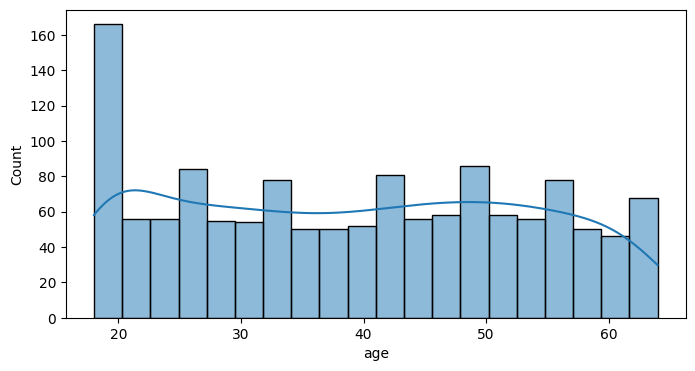

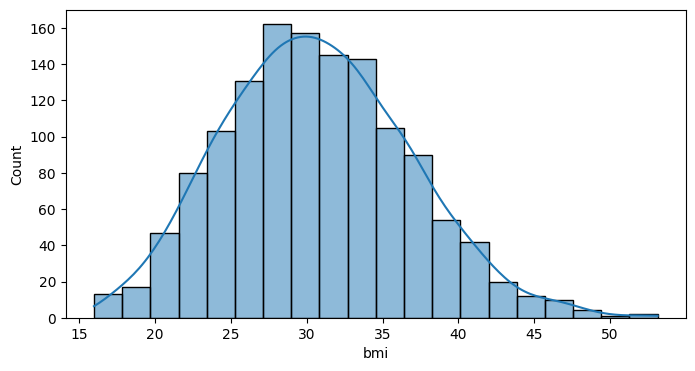

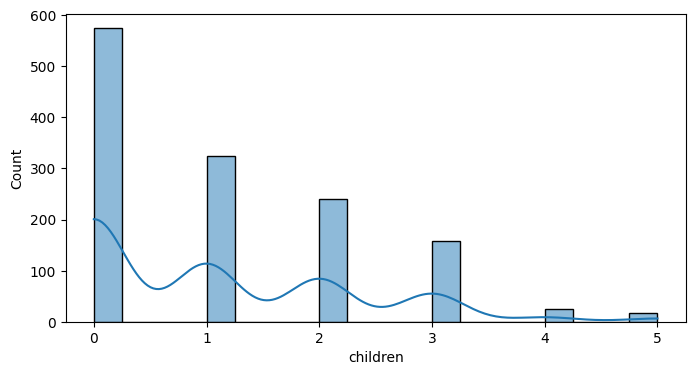

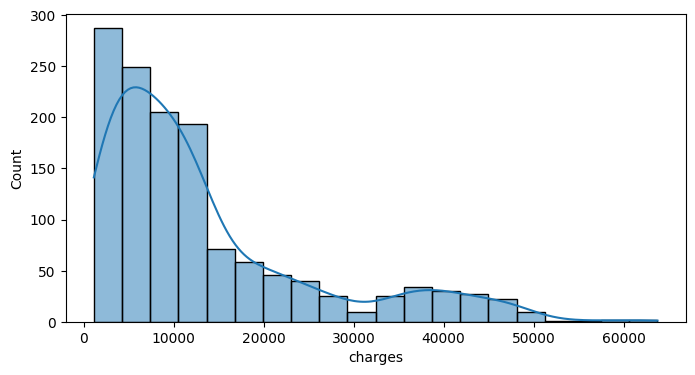

In [134]:
# Visualizing the distribution of numerical data
num_col = ['age', 'bmi', 'children', 'charges']

for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, palette='GnBu')

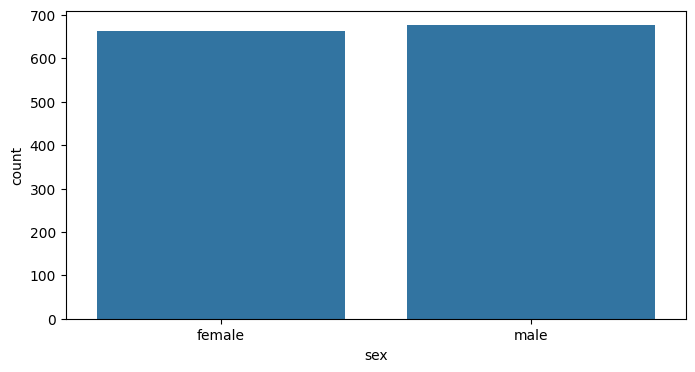

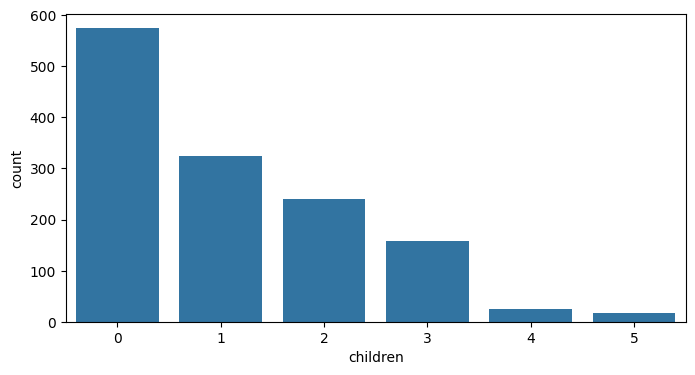

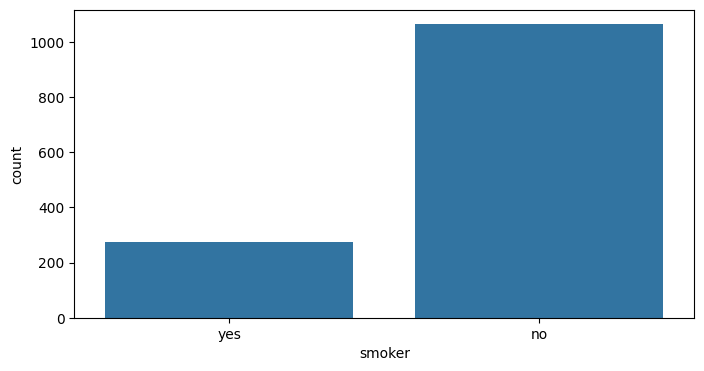

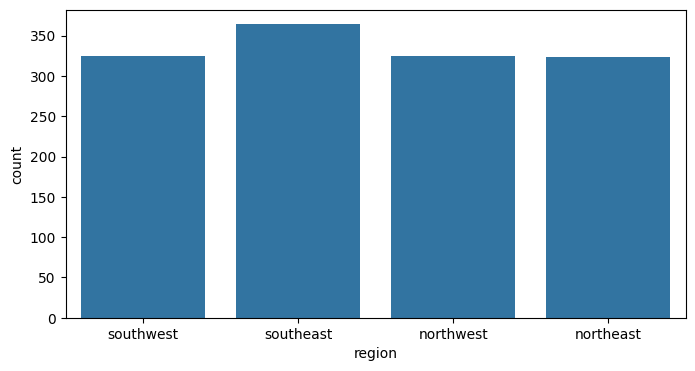

In [135]:
# visualizing categorical Data 

cat_data = [ 'sex', 'children', 'smoker', 'region']

for col in cat_data:
    plt.figure(figsize=(8,4))
    sns.countplot( x = df[col])

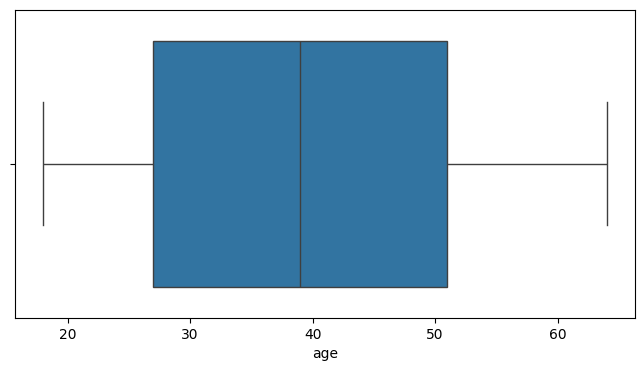

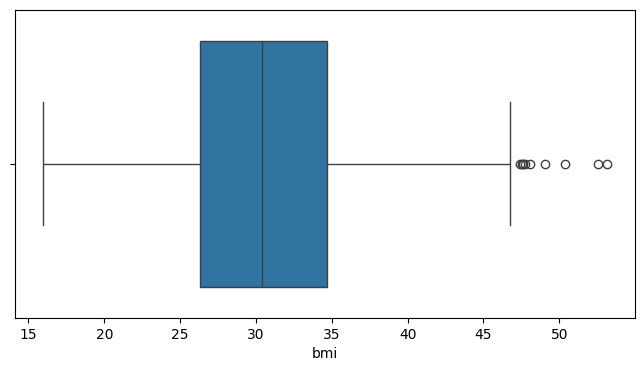

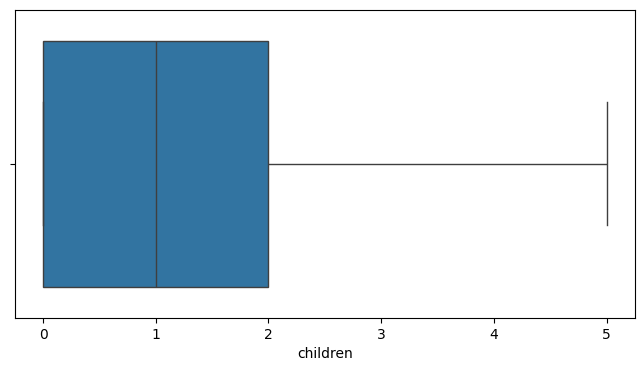

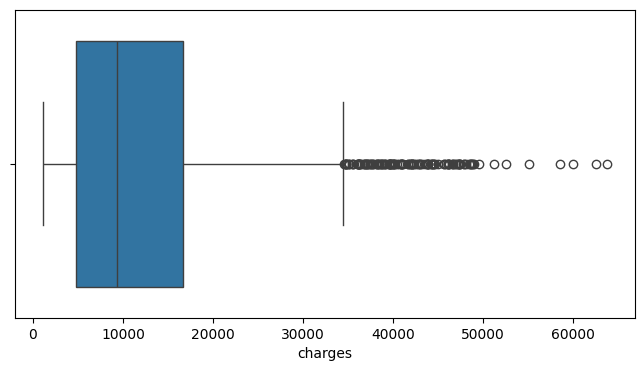

In [136]:
# boxplot of numerical data

for col in num_col:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])

<Axes: >

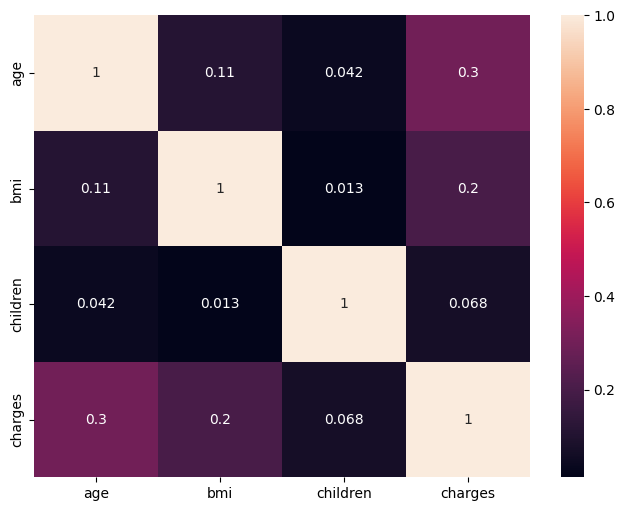

In [137]:
# to see the correlation

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Cleaning and Preprocessing

In [138]:
df_clean = df.copy()
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [139]:
df_clean.shape

(1338, 7)

In [140]:
# to remove duplicates 

df_clean.drop_duplicates(inplace=True)

In [141]:
df_clean.shape

(1337, 7)

In [142]:
df_clean.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [143]:
# to change the data type into numerical
df_clean.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [144]:
# to know - if the categorical is suitable to turn to numerical 
for col in cat_data:
    print(df_clean[col].value_counts())
    print("---------------------------------")

sex
male      675
female    662
Name: count, dtype: int64
---------------------------------
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
---------------------------------
smoker
no     1063
yes     274
Name: count, dtype: int64
---------------------------------
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
---------------------------------


In [145]:
# lets change male - 0 and female - 1

df_clean['sex'] = df_clean['sex'].map({'male': 0, 'female': 1})
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [146]:
# same task to smoker column

df_clean['smoker'] = df_clean['smoker'].map({'yes': 1, 'no': 0})
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [147]:
# now rename both the column to make it more readable

df_clean.rename(columns={
    'sex' : 'is_female',
    'smoker': 'is_smoker'
},inplace=True)

df_clean.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [148]:
# lets encode region in one hot encoding

df_clean = pd.get_dummies(df_clean, columns=['region'], drop_first=True)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [149]:
df_clean = df_clean.astype(int)
df_clean.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0


# Feauture Engineering